### Teste Técnico Bagy
---
Neste documento está contida a análise do dataset fornecido pela Bagy. O objetivo desta análise é responder as seguintes perguntas:
1) Quais as 10 lojas com maior faturamento em pedidos? Sumarize os dados dessa loja
apresentando os seguintes campos:
    - StoreId
    - Volume total de itens vendidos
    - Valor total vendido
2) Qual ticket médio mensal dos pedidos apresentados? Qual o volume médio mensal de
vendas (todas as lojas)?
3) Existe alguma correlação entre o país e o volume de itens vendidos? Qual o item mais
vendido e o menos vendido no país com maior volume de vendas?
4) Extra - A partir dos números apresentados e o seu conhecimento prévio, apresente
ideais/estratégias que podem ser implementadas para auxiliar nossos lojistas a aumentarem
o volume de vendas?

##### Carregando o dataset e criando as colunas necessárias

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# para ler o arquivo corretamente é preciso levar em conta que ele está separado por ';'
# e que o encoding adequado não é utf-8 como de costume
df = pd.read_csv('teste_dados_ecommerce.csv', sep=';', encoding='latin-1')

# criando uma coluna com o valor total de cada pedido ao multiplicar a quantidade de unidades
# pelo valor de cada uma
df['Total'] = df['Quantity'] * df['UnitPrice']

# convertendo a coluna de data de string para TIMESTAMP
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

##### Pergunta 1

In [39]:
# separando o dataset por id das lojas e calculando a soma das colunas 'Quantity' e 'Total'
lojas_total = df.groupby(by=['StoreId'])[['Quantity', 'Total']].sum()

# ordenando os valores e selecionando as top 10 lojas
lojas_total.sort_values(by=['Total'], ascending=False).head(10)

,Quantity,Total
StoreId,,
17,337514,659675.740
4,350583,607875.170
13,266709,525823.970
5,251249,505066.590
15,268690,504586.530
16,259878,501436.810
9,271067,494288.550
2,241355,493832.540
1,236687,488837.071


Como pode ser observado, na tabela acima temos a ID da cada loja seguido pelo número total de pedidos e o faturamento total. <br>
Nessa tabela estao presentes apenas as _**10 lojas com maior faturamento**_, ranquedas por faturamento total. <br>
**_A loja com maior faturamento foi a 17_**, que embora não tenha sido a que mais vendeu foi a que mais faturou.

<AxesSubplot:xlabel='StoreId'>

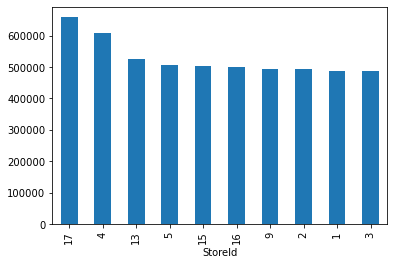

In [47]:
# novamente ordenando os valores e selecionando as top 10 lojas, mas gerando um grafico de barras
lojas_total.sort_values(by=['Total'], ascending=False)['Total'].head(10).plot(kind='bar')

##### Pergunta 2

In [10]:
dates = df.set_index('InvoiceDate')
grouped_2 = dates.groupby(by=['StoreId', dates.index.year, dates.index.month])['Total'].mean()
grouped_2

StoreId  InvoiceDate  InvoiceDate
1        2010         12             12.001664
         2011         1              14.704306
                      2              18.821363
                      3              21.695318
                      4              11.288588
                                       ...    
20       2011         8              18.985017
                      9              19.737702
                      10             17.884598
                      11             17.971452
                      12             17.888788
Name: Total, Length: 260, dtype: float64

In [18]:
# agrupando os dados por ano e mês
qtd_media_vendas_mensais = dates.groupby(by=[dates.index.year, dates.index.month])

# separando a coluna de quantidade, somando o total para cada mês e gerando a média
qtd_media_vendas_mensais['Quantity'].sum().mean()

398188.46153846156

In [19]:
# agrupando os dados por ano e mês
total_media_vendas_mensais = dates.groupby(by=[dates.index.year, dates.index.month])

# separando a coluna do total, somando o total para cada mês e gerando a média
total_media_vendas_mensais['Total'].sum().mean()

749826.7641538461

Com base nisso, podemos ver que o **_volume médio de vendas mensal_** (considerando todas as lojas) <br>
foi de 398.188 unidades em quantidade e $749.826,76 em faturamento.

##### Pergunta 3

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

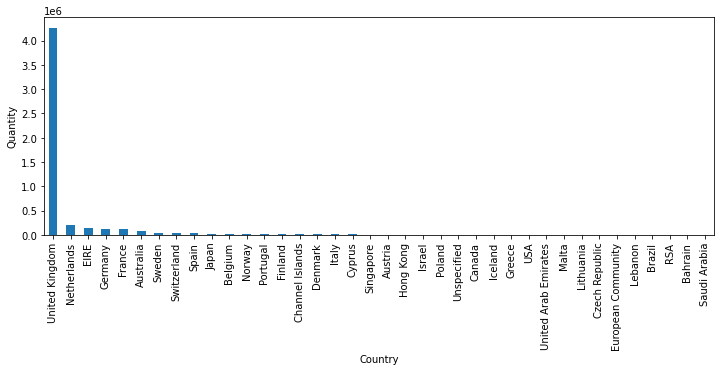

In [61]:
# agrupando dados por paises e somando o total de unidades vendidas em cada um
vendas_por_pais = df.groupby(by=['Country'])['Quantity'].sum()

# ordenando o resultado pelo total de unidades e gerando um grafico de barras
vendas_por_pais.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), ylabel='Quantity')

Fica evidente que a maioria das vendas se concentra no Reino Unido, além de alguns poucos países europeus.<br>
Como a concentração no Reino Unido é muito alta, é possível inferir que esta plataforma de vendas é muito<br>
mais conhecida e acessada lá do que em qualquer outro lugar no mundo. Além disso, fica evidente que o pú-<br>
blico em geral é europeu e que se existe interesse em expandir e diversificar esses clientes será preciso focar<br>
bastante no marketing em outros países.

In [67]:
# agrupando os dados por pais e item vendido, depois somando o total de vendas para cada item
mais_vendido_uk = df.groupby(by=['Country', 'Description'])[['Quantity']].sum()

# selecionando o resultado do reino unido
mais_vendido_uk.loc['United Kingdom'].sort_values('Quantity')

,Quantity
Description,
printing smudges/thrown away,-19200
"Unsaleable, destroyed.",-15644
check,-12030
Printing smudges/thrown away,-9058
Damaged,-7540
...,...
WHITE HANGING HEART T-LIGHT HOLDER,33193
ASSORTED COLOUR BIRD ORNAMENT,33679
POPCORN HOLDER,34365


A tabela acima apresenta o item **_WORLD WAR 2 GLIDERS ASSTD DESIGNS_** como o mais vendido no Reino Unido com um total de **_48.326 unidades_**.<br>
Já o item menos 'vendido' foram itens defeituosos com erros que foram descartados, representado um total negativo de **_-19.200 unidades_**. Se descon-<br>
isderamos itens negativos, o resultado é que existiram vários itens sem nenhuma venda registada.

##### Pergunta 4 - Extra

---

- Tendo em vista a análise realizada, os lojistas que buscam aumentar suas vendas deveriam focar primariamente no mercado do Reino Unido. Isso significa<br>
investir mais em anúncios neste país e ter sempre em mente os indicadores de mercado para este país, já que é nele onde se concentram a esmagadora<br>
maioria dos consumidores e consequentemente das vendas.

- Direcionar uma parte do investimento para outros mercados pode ser uma opção inteligente para conquistar novos espaços de menor concorrência, mas é<br>
necessário ter cautela, uma vez que primeiro se faz útil entender o motivo da concentração num só país para a partir disso pensar em como diversificar. Um<br>
cenário de aparente pouca concorrência pode ser enganoso, já que podem existir fatores ocultos não compreendidos nos dados em questão, como uma pla-<br>
taforma concorrente nos outros países que concentra as vendas neste.